In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
path = r"Data\house_prices_multivariate.csv"

In [7]:
df = pd.read_csv(path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


(array([105., 692., 367., 134.,  52.,  18.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <a list of 10 Patch objects>)

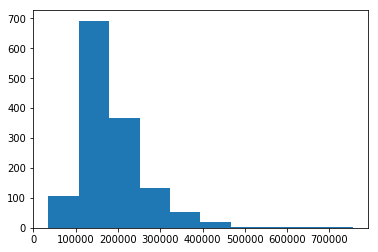

In [8]:
plt.hist(df['SalePrice'], bins=10)

Text(0, 0.5, 'Garage Area')

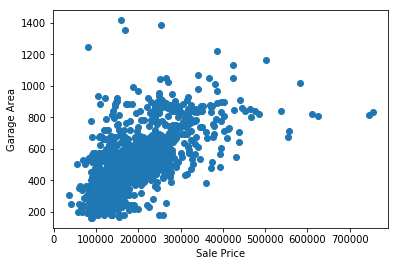

In [6]:
plt.scatter(df.SalePrice, df.GarageArea)
plt.xlabel("Sale Price")
plt.ylabel("Garage Area")

([<matplotlib.patches.Wedge at 0x8b14e10>,
 [Text(0.733682,0.81958,'1 car'),
  Text(-1.00578,-0.445425,'2 car'),
  Text(0.997497,-0.463681,'3 car'),
  Text(1.09993,-0.0125297,'4 car')])

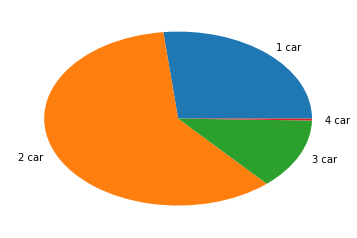

In [9]:
garage = df.groupby('GarageCars')['GarageCars'].count()
plt.pie(garage,labels=[str(x) + " car" for x in garage.index])

185479.511240029
167500.0
0    140000
dtype: int64


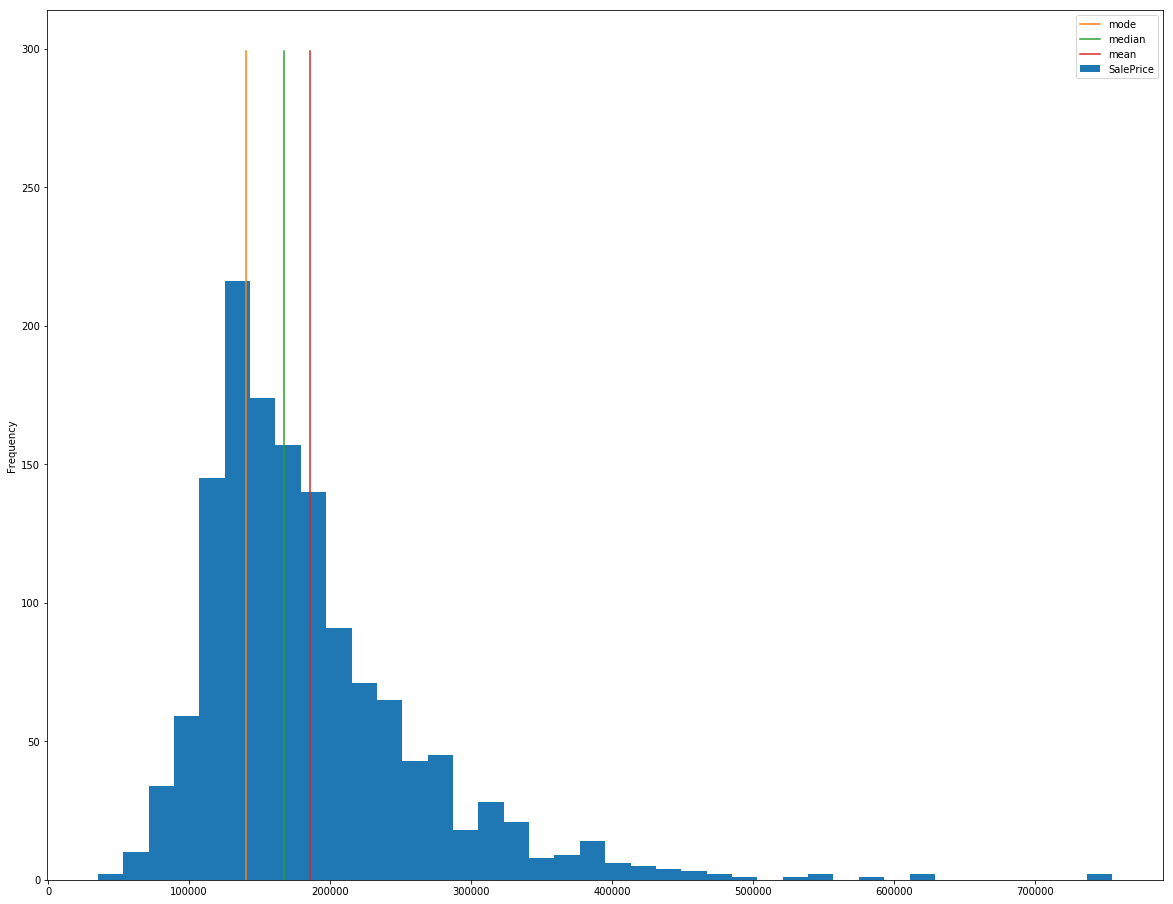

In [10]:
mean = df.SalePrice.mean()
median = df.SalePrice.median()
mode = df.SalePrice.mode()
print(mean)
print(median)
print(mode)

df.SalePrice.plot(kind='hist',bins=40,figsize=(20,16))
plt.plot([mode]*300, range(300), label='mode')
plt.plot([median]*300, range(300), label='median')
plt.plot([mean]*300, range(300), label='mean')
plt.legend()

In [9]:
 26+45+70+90

231

In [10]:
68*5

340

In [11]:
340-231

109

In [12]:
 (26+45+70+90+109)/5

68.0

In [13]:
(20+31+45+68+109)/5

54.6

In [11]:
maximum = df.SalePrice.max()
minimum = df.SalePrice.min()
range_saleprice = maximum-minimum
print(range_saleprice)

719689


In [12]:
mean = df.SalePrice.mean()
distance = [abs(x-mean) for x in df.SalePrice]
mad = sum(distance)/len(distance)
mad

57166.388105851765

In [13]:
mad = df.SalePrice.mad()
mad

57166.388105851765

In [14]:
mean = df.SalePrice.mean()
sd = (sum([(x - mean)**2 for x in df.SalePrice])/(len(df.SalePrice)))**(1/2)
sd

78995.2327962342

In [15]:
sd = df.SalePrice.std()
sd

79023.89059975129

In [16]:
garage_mean = df.GarageArea.mean()
garage_std = df.GarageArea.std()
lot_mean = df.LotArea.mean()
lot_std = df.LotArea.std()
garage_cv = garage_std/garage_mean*100
lot_cv = lot_std/lot_mean*100
print(garage_cv, lot_cv)

37.07958381008546 95.50188389630667


In [17]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
iqr = q3 - q1
iqr

83750.0

Text(0,0.5,'Sale Price')

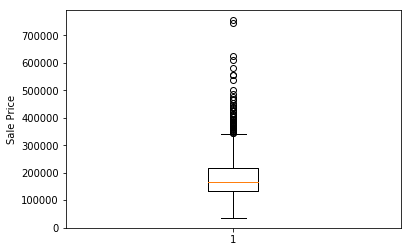

In [18]:
plt.boxplot(df.SalePrice)
plt.ylabel('Sale Price')

In [23]:
new = df[['LotArea','SalePrice']]
mean_lotarea = new['LotArea'].mean()
mean_saleprice = new['SalePrice'].mean()
diff_lotarea = new['LotArea'] - mean_lotarea
diff_saleprice = new['SalePrice'] - mean_saleprice
summation = sum(diff_lotarea*diff_saleprice)
covariance = summation/len(diff_lotarea)
covariance

204011544.79797772

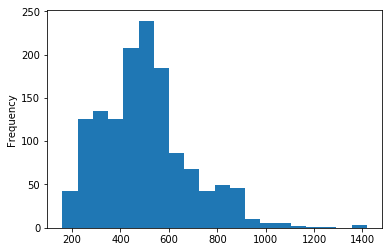

In [20]:
df.GarageArea.plot(kind='hist',bins=20)

In [34]:
newdf = df[['LotArea','SalePrice']].copy()
covariance = newdf.cov().iloc[0,1]
covariance

204159593.8145219

In [36]:
std_LotArea = newdf.LotArea.std()
std_SalePrice = newdf.SalePrice.std()
print(std_LotArea, std_SalePrice)

10214.702132528444 79023.89059975129


In [50]:
pearson = covariance/(std_LotArea*std_SalePrice)
pearson

0.2529214590904538

In [51]:
newdf['LotAreaRank'] = newdf.LotArea.rank(axis=0)
newdf['SalePriceRank'] = newdf.SalePrice.rank(axis=0)
newdf['d^2'] = (newdf.LotAreaRank-newdf.SalePriceRank)**2
d_square = newdf['d^2'].sum()
spearman = 1-((6*d_square)/(len(newdf.LotArea)*((len(newdf.LotArea)**2)-1)))
spearman

0.4377726002817094

In [54]:
df.iloc[0:20].LotArea

0      8450
1      9600
2     11250
3      9550
4     14260
5     14115
6     10084
7     10382
8      6120
9      7420
10    11200
11    11924
12    12968
13    10652
14    10920
15     6120
16    11241
17    10791
18    13695
19     7560
Name: LotArea, dtype: int64

In [57]:
df.iloc[0:19].LotArea.mean()

10565.368421052632

In [58]:
df.iloc[0:19].LotArea.std()

2372.2283057292198